<a href="https://colab.research.google.com/github/keeley1/mnist-model/blob/main/coursework_one_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
def mnist_peek(rows, cols):
    fig, axs = plt.subplots(rows, cols)
    for i in range(rows):
        for j in range(cols):
            axs[i, j].imshow(train_images[i * cols + j], cmap=plt.cm.binary)

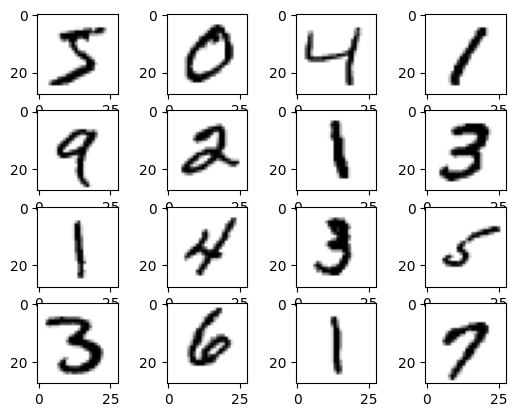

In [4]:
mnist_peek(4, 4)

In [5]:
print("tensor:\t\t shape")
print("-"*22)
print("training images:", train_images.shape)
print("training labels:", train_labels.shape)
print("test images:\t", test_images.shape)
print("test labels:\t", test_labels.shape)

tensor:		 shape
----------------------
training images: (60000, 28, 28)
training labels: (60000,)
test images:	 (10000, 28, 28)
test labels:	 (10000,)


label:  0


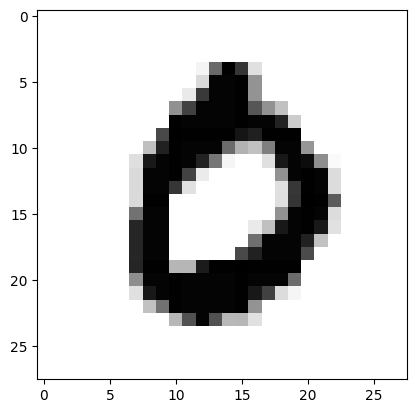

In [6]:
# lets inspect one of the images
print('label: ', test_labels[3])
plt.imshow(test_images[3], cmap=plt.cm.binary)
plt.show()

In [8]:
raw_test_images, raw_test_labels = test_images, test_labels

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [9]:
from tensorflow.keras.utils import to_categorical

orig_label   = test_labels[8]
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

# check encoding
print(f"'{orig_label}' as a one-hot vector: {test_labels[8]}")

'5' as a one-hot vector: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [11]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Model accuracy: {test_accuracy}")
print(f"Loss: {test_loss}")

313/313 [==============================] - 2s 3ms/step - loss: 2.3027 - accuracy: 0.0959
Model accuracy: 0.09589999914169312
Loss: 2.3027279376983643


In [12]:
# lets train the model
model_one = tf.keras.models.Sequential()
model_one.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model_one.add(tf.keras.layers.Dense(10, activation='softmax'))

model_one.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

model_one_history = model_one.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 2.2318 - accuracy: 0.2676
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 1.6448 - accuracy: 0.6133
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 1.0168 - accuracy: 0.7552
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.7288 - accuracy: 0.8159
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5914 - accuracy: 0.8451


In [13]:
preds = model_one.predict(test_images[:1], verbose=0) # note the syntax: test_images[:1] keeps the batch dimension!
argm = np.argmax(preds[0])
for i, x in enumerate(preds[0]):
    if i == argm:
        print(f"\033[1mclass: {i:2} with probability: {x:.15f}\033[0m")
    else:
        print(f"class: {i:2} with probability: {x:.15f}")

class:  0 with probability: 0.000651079230011
class:  1 with probability: 0.000062099781644
class:  2 with probability: 0.000120478791359
class:  3 with probability: 0.001456590718590
class:  4 with probability: 0.000683043967001
class:  5 with probability: 0.001822961494327
class:  6 with probability: 0.000005526801942
class:  7 with probability: 0.974163651466370
class:  8 with probability: 0.000323097279761
class:  9 with probability: 0.020711554214358


In [18]:
# now lets print the known label
print(test_labels[0])

# in original form
orig_label = test_labels[0]
decoded_orig_label = tf.argmax(orig_label).numpy()

print()
print(decoded_orig_label)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

7


In [19]:
preds = model_one.predict(test_images[1:2], verbose=0) # note the syntax: test_images[:1] keeps the batch dimension!
argm = np.argmax(preds[0])
for i, x in enumerate(preds[0]):
    if i == argm:
        print(f"\033[1mclass: {i:2} with probability: {x:.15f}\033[0m")
    else:
        print(f"class: {i:2} with probability: {x:.15f}")

class:  0 with probability: 0.039486419409513
class:  1 with probability: 0.001555120805278
class:  2 with probability: 0.638978540897369
class:  3 with probability: 0.090200595557690
class:  4 with probability: 0.000027978707294
class:  5 with probability: 0.053073175251484
class:  6 with probability: 0.144164130091667
class:  7 with probability: 0.000003587143510
class:  8 with probability: 0.032497629523277
class:  9 with probability: 0.000012789761058


In [20]:
# now lets print the known label
print(test_labels[1])

# in original form
orig_label = test_labels[1]
decoded_orig_label = tf.argmax(orig_label).numpy()

print()
print(decoded_orig_label)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]

2
